<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/Support_vector_machine_2023_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Support vector machines are used for both Classification and Regressions.

SVM uses a margin around its classifier or regressor. The margin provides an extra robustness and accuracy to the model and its performance.

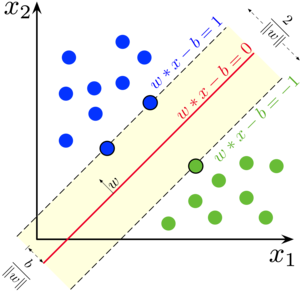

The above image describes a SVM classifier. The Red line is the actual classifier and the dotted lines show the boundary. The points that lie on the boundary actually decide the Margins. They support the classifier margins, so they are called Support Vectors.

The distance between the classifier and the nearest points is called Marginal Distance.

There can be several classifiers possible but we choose the one with the maximum marginal distance. So, the marginal distance and the support vectors help to choose the best classifier.



## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/ML_data/Social_Network_Ads.csv'
dataset = pd.read_csv(file_path)

In [ ]:
#  dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

In [ ]:
print(y_train)

In [ ]:
print(X_test)

In [ ]:
print(y_test)

## Feature Scaling
The StandardScaler is a preprocessing technique commonly used in machine learning to standardize or normalize the features (variables) of a dataset.

It is part of the scikit-learn library in Python.

 The purpose of standardization is to make sure that all the features have **a mean of 0 and a standard deviation of 1**. This can be important for certain machine learning algorithms that are sensitive to the scale of the features.


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66  2]
 [ 8 24]]


0.9

## Visualising the Training set results

## X_set, y_set = sc.inverse_transform(X_train), y_train

This line is transforming your scaled training data (X_train) back to its original scale using the inverse_transform method of the sc (presumably a StandardScaler) object.

X_set now contains the original feature values,

y_set contains the corresponding labels.



**np.meshgrid** is a function in the NumPy library (often used in conjunction with Matplotlib) that is used to create two-dimensional grids or matrices based on two one-dimensional arrays. These grids are commonly used in various applications, including plotting and vectorized calculations.

## Visualising the Test set results

<ipython-input-47-1b61265f2331>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


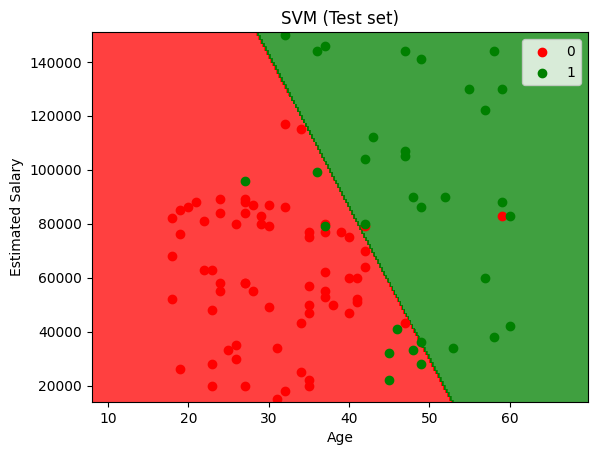

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
para_C = 10

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=para_C)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9300


# Run SVM with linear Kernel

## Be careful to select C value



In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.8900


In [ ]:
y_pred_train = linear_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8300


# Check for overfitting and underfitting

The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.8300
Test set score: 0.8900


### Compare model accuracy with null accuracy


So, the model accuracy is 0.9832. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

 to count the occurrences of unique values in that array, you can use the np.unique function along with the return_counts=True parameter to achieve this.

In [ ]:
# Use np.unique with return_counts=True to count unique values
unique_values, counts = np.unique(y_test, return_counts=True)

# Create a dictionary to store the counts of each unique value
value_counts = dict(zip(unique_values, counts))

# Print the value counts
print(value_counts)






{0: 68, 1: 32}


The "null accuracy" or "baseline accuracy" is a concept used in classification tasks to measure the accuracy that can be achieved by always predicting the most frequent class in the dataset, regardless of the input features.

It serves as a baseline or reference point to compare the performance of a machine learning model. The null accuracy score is often used to assess whether a classification model provides meaningful improvements over a simple, naive approach.

To calculate the null accuracy score, follow these steps:

Determine the most frequent class in your target variable (the class you would predict if you were using the null model).

Calculate the frequency or proportion of this most frequent class in your dataset.

This proportion is your null accuracy score.

In [ ]:
# check null accuracy score

null_accuracy = (68/(68+32))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6800


# Run SVM with polynomial kernel

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=10.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.8500


In [ ]:
## Polynomial kernel gives poor performance. It may be overfitting the training set.

# Run SVM with sigmoid kernel

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.7400


We can see that sigmoid kernel is also performing poorly just like with polynomial kernel.

### Comments
One such metric to analyze the model performance in imbalanced classes problem is `Confusion matrix`.

# **Confusion matrix** <a class="anchor" id="16"></a>


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**




In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[66  2]
 [ 9 23]]

True Positives(TP) =  66

True Negatives(TN) =  23

False Positives(FP) =  2

False Negatives(FN) =  9


<Axes: >

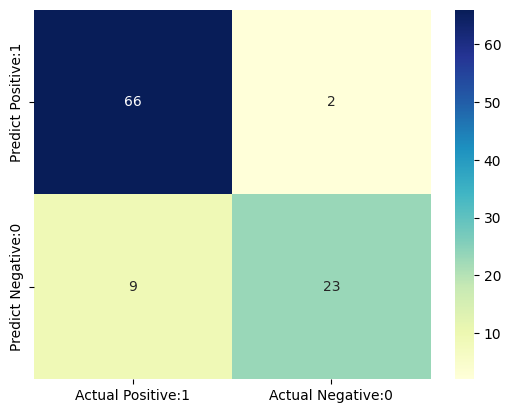

In [ ]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

#  Hyperparameter Optimization using GridSearch CV** <a class="anchor" id="20"></a>


In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC()



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]




grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

Our original model test accuracy is 0.9832 while GridSearch CV score on test-set is 0.9835.
So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.
Here, we should not confuse best_score_ attribute of grid_search with the score method on the test-set.
The score method on the test-set gives the generalization performance of the model. Using the score method, we employ a model trained on the whole training set.
The best_score_ attribute gives the mean cross-validation accuracy, with cross-validation performed on the training set.